In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss
import pingouin as pg

In [2]:
from factor_analyzer import FactorAnalyzer

In [3]:
med = pd.read_csv(Path.cwd() / 'data' / 'medFactor.csv')
med.head()

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
0,20,16,52,10,24,23,19,20,23,29,67
1,24,16,52,7,27,16,16,15,31,33,59
2,19,21,57,18,22,23,16,19,42,40,61
3,24,21,62,12,31,25,17,17,36,36,77
4,29,18,62,14,26,27,15,20,33,29,88


In [5]:
pg.multivariate_normality(med, alpha=0.1)

HZResults(hz=124.8479134609871, pval=0.0, normal=False)

In [6]:
ss.shapiro(med['lung'])

ShapiroResult(statistic=0.9579742550849915, pvalue=0.0005490659968927503)

In [11]:
med.describe()

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,19.960938,18.820312,54.695312,12.867188,25.640625,23.179688,16.171875,15.867188,38.812500,33.539062,66.906250
std,4.464034,4.088458,7.428990,2.986508,3.805786,4.159106,2.478599,2.651314,7.798395,4.097055,12.565067
min,4.000000,9.000000,26.000000,3.000000,16.000000,11.000000,4.000000,7.000000,16.000000,17.000000,9.000000
25%,17.000000,16.000000,50.750000,11.000000,23.000000,22.000000,15.000000,14.000000,34.000000,32.000000,59.000000
50%,20.000000,19.000000,55.000000,13.000000,26.000000,23.000000,17.000000,16.000000,40.000000,34.000000,67.000000
75%,23.000000,22.000000,60.250000,15.000000,29.000000,25.000000,18.000000,18.000000,45.000000,36.000000,76.000000
max,29.000000,28.000000,69.000000,19.000000,32.000000,56.000000,20.000000,20.000000,51.000000,41.000000,93.000000


In [12]:
fa = FactorAnalyzer(rotation=None).fit(med)
ev, v = fa.get_eigenvalues()
ev, v

(array([3.37918137, 1.48277065, 1.25063015, 0.98047706, 0.7688022 ,
        0.73305114, 0.64039936, 0.62219335, 0.52837181, 0.35193006,
        0.26219284]),
 array([ 2.87429658,  0.92121209,  0.82708599,  0.32961252,  0.14798142,
         0.11630939,  0.03260218, -0.078728  , -0.09010899, -0.16583141,
        -0.29405096]))

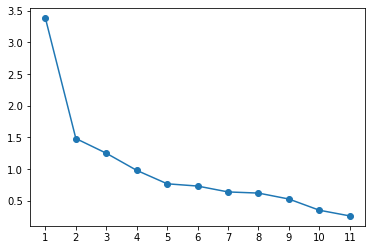

In [15]:
plt.plot(ev, marker='o')
plt.xticks(ticks=np.arange(11), labels=np.arange(1, 12))
plt.show()

In [20]:
fa_varimax = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal').fit(med)
fa_varimax.loadings_

array([[ 0.82808075, -0.01127504,  0.08628291,  0.04859413],
       [ 0.01442068, -0.11105114,  0.79811225,  0.17111399],
       [ 0.7863582 ,  0.04631129,  0.12820724,  0.28811684],
       [ 0.23753121,  0.20612517,  0.77433075,  0.02258082],
       [ 0.46421471,  0.28567006, -0.10031512,  0.57747284],
       [ 0.12372203,  0.027651  ,  0.25408005,  0.85274757],
       [ 0.44383384,  0.46051392,  0.12988849,  0.22842996],
       [ 0.03123887,  0.61165478,  0.35338127, -0.00875328],
       [ 0.5247712 ,  0.49466448,  0.31331989, -0.33315929],
       [ 0.23509342,  0.71035045,  0.02228321,  0.12646836],
       [-0.12724924,  0.71674351, -0.19021636,  0.03657157]])

In [21]:
# communality와 인자고유분산(uniqueness)
fa_varimax.get_communalities(), fa_varimax.get_uniquenesses()

(array([0.69565099, 0.67880347, 0.71995236, 0.69900667, 0.6406407 ,
        0.80780681, 0.47811281, 0.50005238, 0.72924223, 0.57635746,
        0.56743336]),
 array([0.30434901, 0.32119653, 0.28004764, 0.30099333, 0.3593593 ,
        0.19219319, 0.52188719, 0.49994762, 0.27075777, 0.42364254,
        0.43256664]))

In [23]:
fa_df = pd.DataFrame(fa_varimax.loadings_, index=med.columns, columns=['F1', 'F2', 'F3', 'F4'])
fa_df

,F1,F2,F3,F4
lung,0.828081,-0.011275,0.086283,0.048594
muscle,0.014421,-0.111051,0.798112,0.171114
liver,0.786358,0.046311,0.128207,0.288117
skeleton,0.237531,0.206125,0.774331,0.022581
kidneys,0.464215,0.285670,-0.100315,0.577473
heart,0.123722,0.027651,0.254080,0.852748
step,0.443834,0.460514,0.129888,0.228430
stamina,0.031239,0.611655,0.353381,-0.008753
stretch,0.524771,0.494664,0.313320,-0.333159
blow,0.235093,0.710350,0.022283,0.126468


In [24]:
fa_df.idxmax(axis=1)

lung        F1
muscle      F3
liver       F1
skeleton    F3
kidneys     F4
heart       F4
step        F2
stamina     F2
stretch     F1
blow        F2
urine       F2
dtype: object

In [51]:
fa_obm = FactorAnalyzer(n_factors=4, rotation='promax', method='principal').fit(med)
fa_obm.loadings_.round(3)

array([[ 0.945, -0.232, -0.049, -0.071],
       [-0.108, -0.181,  0.859,  0.221],
       [ 0.838, -0.152,  0.013,  0.183],
       [ 0.101,  0.106,  0.76 ,  0.023],
       [ 0.395,  0.223, -0.174,  0.51 ],
       [-0.036,  0.01 ,  0.297,  0.873],
       [ 0.348,  0.39 ,  0.037,  0.161],
       [-0.167,  0.638,  0.317, -0.014],
       [ 0.493,  0.372,  0.179, -0.421],
       [ 0.077,  0.724, -0.067,  0.074],
       [-0.299,  0.838, -0.234,  0.024]])

In [52]:
# communality와 인자고유분산(uniqueness)
fa_obm.get_communalities(), fa_obm.get_uniquenesses()

(array([0.95414288, 0.83086735, 0.75943936, 0.60004208, 0.49652333,
        0.85162308, 0.30052969, 0.53561803, 0.59095958, 0.54013375,
        0.84727643]),
 array([0.04585712, 0.16913265, 0.24056064, 0.39995792, 0.50347667,
        0.14837692, 0.69947031, 0.46438197, 0.40904042, 0.45986625,
        0.15272357]))

In [53]:
fa_df = pd.DataFrame(fa_obm.loadings_, index=med.columns, columns=['F1', 'F2', 'F3', 'F4'])
fa_df.idxmax(axis=1)

lung        F1
muscle      F3
liver       F1
skeleton    F3
kidneys     F4
heart       F4
step        F2
stamina     F2
stretch     F1
blow        F2
urine       F2
dtype: object

In [54]:
# return : variance, proportional_variance, cumulative_variance
fa_obm.get_factor_variance()

(array([2.26214499, 2.09579603, 1.62970148, 1.31951306]),
 array([0.20564954, 0.19052691, 0.14815468, 0.11995573]),
 array([0.20564954, 0.39617646, 0.54433114, 0.66428687]))

In [57]:
fa_obm = FactorAnalyzer(n_factors=7, rotation='promax', method='principal').fit(med)
fa_obm.loadings_.round(3)

array([[ 0.977,  0.068,  0.051, -0.121,  0.05 , -0.048, -0.104],
       [ 0.073,  0.08 ,  0.875,  0.122, -0.14 ,  0.032, -0.081],
       [ 0.773, -0.091, -0.006,  0.153, -0.037,  0.105,  0.08 ],
       [-0.059, -0.038,  0.704,  0.058,  0.418, -0.011,  0.063],
       [ 0.099,  0.037, -0.151,  0.648,  0.162, -0.181,  0.199],
       [-0.068, -0.071,  0.248,  0.95 , -0.219,  0.003, -0.012],
       [-0.049,  0.064, -0.051,  0.101, -0.   ,  0.144,  0.919],
       [ 0.026, -0.021,  0.036, -0.121,  0.002,  0.969,  0.154],
       [ 0.044, -0.071,  0.124, -0.266,  0.947, -0.098,  0.141],
       [-0.033,  0.093, -0.142,  0.276,  0.696,  0.234, -0.261],
       [ 0.004,  1.018,  0.077, -0.066, -0.036, -0.021,  0.074]])

In [58]:
# cumulative_variance의 결과값을 보고 유의미한지를 판단하는 것도 한 방법일듯
fa_obm.get_factor_variance()

(array([1.57975167, 1.08087522, 1.39254126, 1.55377666, 1.65397675,
        1.07086863, 1.03017618]),
 array([0.14361379, 0.09826138, 0.12659466, 0.14125242, 0.15036152,
        0.09735169, 0.09365238]),
 array([0.14361379, 0.24187517, 0.36846983, 0.50972226, 0.66008378,
        0.75743547, 0.85108785]))